In [1]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\patri\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5183 - acc: 0.7860 - val_loss: 0.4128 - val_acc: 0.8438
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3116 - acc: 0.9057 - val_loss: 0.3100 - val_acc: 0.8855
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2283 - acc: 0.9279 - val_loss: 0.2800 - val_acc: 0.8912
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1803 - acc: 0.9427 - val_loss: 0.2897 - val_acc: 0.8850
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1430 - acc: 0.9559 - val_loss: 0.2928 - val_acc: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1216 - acc: 0.9637 - val_loss: 0.3525 - val_acc: 0.8671
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0991 - acc: 0.9727 - val_loss: 0.3324 - val_acc: 0.8765
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0836 - a

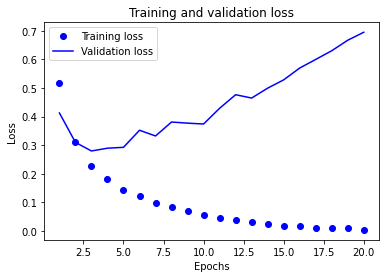

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']



epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

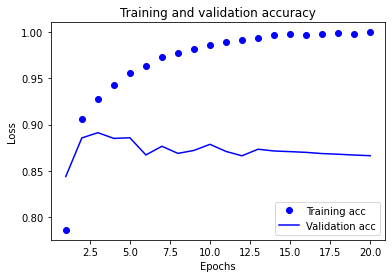

In [13]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4485 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2566 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2006 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8813


In [15]:
results

[0.29819008708000183, 0.8813199996948242]